<h1 align="center">Machine Learning - 25737</h1>
<h4 align="center">Dr. Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Project phase 1</h4>
<h4 align="center">Amir Hossein Yari , Amir Hossein Moraveji</h4>
<h5 align="center">99102507 , 99104232</h5>



## <font color='yellow'>1. Plot data</font>

e:\Python\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


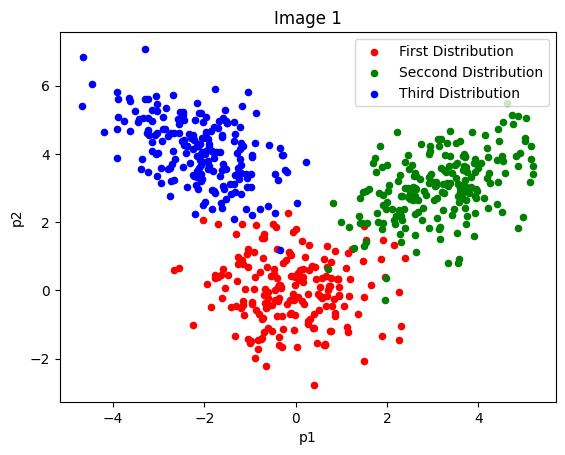

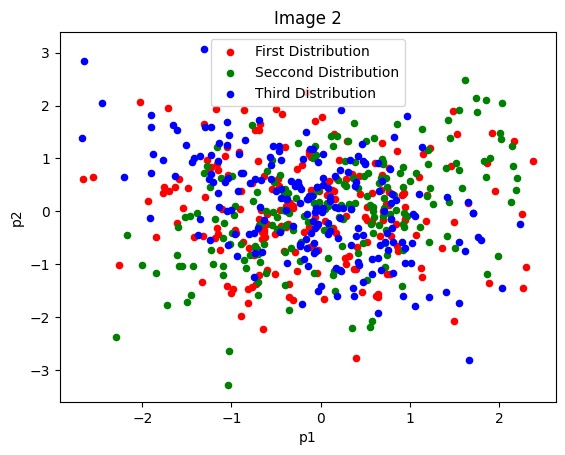

In [14]:
# add required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# read image 1 and image 2
df1 = pd.read_csv('Data\Data\Image1.csv')
df2 = pd.read_csv('Data\Data\Image2.csv')

# plotting image 1
plt.figure
ax = plt.gca()
df1.iloc[0:200].plot.scatter(x='p1',y='p2', c='r', label='First Distribution', ax=ax)
df1.iloc[200:400].plot.scatter(x='p1',y='p2', c='g', label='Seccond Distribution', ax=ax)
df1.iloc[400:600].plot.scatter(x='p1',y='p2', c='b', label='Third Distribution', ax=ax)
plt.title("Image 1")
plt.xlabel("p1")
plt.ylabel("p2")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

# plotting image 2
plt.figure
ax = plt.gca()
df2.iloc[0:200].plot.scatter(x='p1',y='p2', c='r', label='First Distribution', ax=ax)
df2.iloc[200:400].plot.scatter(x='p1',y='p2', c='g', label='Seccond Distribution', ax=ax)
df2.iloc[400:600].plot.scatter(x='p1',y='p2', c='b', label='Third Distribution', ax=ax)
plt.title("Image 2")
plt.xlabel("p1")
plt.ylabel("p2")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

## <font color='yellow'>2. E Step</font>

In [15]:
def multivariate_normal_prob(vector, mean, covariance):
    vector = np.matrix(vector).T
    mean = np.matrix(mean).T
    covariance = np.matrix(covariance)
    vector = np.asarray(vector)
    mean = np.asarray(mean)
    covariance = np.asarray(covariance)

    # Calculate the Mahalanobis distance
    diff = vector - mean
    inv_covariance = np.linalg.pinv(covariance)
    mahalanobis_distance = np.dot(np.dot(diff.T, inv_covariance), diff)

    # Calculate the probability using the formula for multivariate normal distribution
    d = len(vector)
    coeff = 1 / ((2 * np.pi)**(d/2) * np.linalg.det(covariance)**(1/2))
    prob = coeff * np.exp(-0.5 * mahalanobis_distance)
    return prob


# E step function
def E_Step(N, K, dataset, pi, mu, sigma):
    w = np.zeros([600,3])
    for n in range(N):
        # calculate denominator
        denominator = 0
        for k in range(K):
            denominator = denominator + pi[n,k] * multivariate_normal_prob(dataset.iloc[n], mu[k,:], sigma[k,:,:])
        for k in range(K):
            w[n,k] = (pi[n,k] * multivariate_normal_prob(dataset.iloc[n], mu[k,:], sigma[k,:,:])) / denominator
    return w

# initialize the means, covariances, and mixture weights with random number
pi = np.zeros([600,3])+[0.2,0.3,0.5]
mu = np.matrix([[2.252,1.215], [1.022,2.123], [1.957,2.526]])
sigma = np.zeros([3,2,2])
sigma[0,:,:] = [[5.978,2.887],[1.124,2.884]]
sigma[1,:,:] = [[5.684,2.477],[1.212,2.369]]
sigma[2,:,:] = [[5.258,2.459],[1.964,2.128]]

# apply E step function
R_1 = E_Step(600,3,df1[df1.columns[1:3]], pi, mu, sigma)
R_2 = E_Step(600,3,df2[df2.columns[1:3]], pi, mu, sigma)

# save R in .csv file
arr = np.asarray(R_1)
pd.DataFrame(arr).to_csv('pi_k(Image 1).csv')
arr = np.asarray(R_2)
pd.DataFrame(arr).to_csv('pi_k(Image 2).csv')

## <font color='yellow'>3. M Step</font>

In [16]:
# M step function
def M_Step(N, K, dataset, w):
    # update mu
    mu_new = np.zeros([K,2])
    for k in range(K):
        # calculate denominator and numerator
        denominator = 0
        numerator = 0
        for n in range(N):
            denominator = denominator + w[n,k]
            numerator = numerator + w[n,k] * dataset.iloc[n]
        mu_new[k,:] = numerator / denominator
    
    # update sigma
    sigma_new = np.zeros([3,2,2])
    for k in range(K):
        # calculate numerator
        numerator = np.zeros([2,2])
        for n in range(N):
            numerator = numerator + w[n,k] * ((np.matrix(dataset.iloc[n]) - mu[k,:]).T @ (np.matrix(dataset.iloc[n]) - mu[k,:]))
        sigma_new[k,:,:] = numerator / denominator

    return mu_new,sigma_new

# apply M step function im image 1
print('OUTPUT OF IMAGE 1')
mu_new, sigma_new = M_Step(600,3,df1[df1.columns[1:3]], R_1)
print('updated mean : ')
print(mu_new)
print('updated sigma : ')
print(sigma_new)

# previous stage mean and sigma
print('previous stage mean : ')
print(mu)
print('previous stage sigma : ')
print(sigma)

# compare with main mean and sigma
print('main mean : ')
print(np.matrix([df1[df1.columns[1:3]].iloc[0:200].mean(),df1[df1.columns[1:3]].iloc[200:400].mean(),df1[df1.columns[1:3]].iloc[400:600].mean()]))
print('main sigma : ')
sigma = np.zeros([3,2,2])
sigma[0,:,:] = np.matrix(df1[df1.columns[1:3]].iloc[0:200].cov())
sigma[1,:,:] = np.matrix(df1[df1.columns[1:3]].iloc[200:400].cov())
sigma[2,:,:] = np.matrix(df1[df1.columns[1:3]].iloc[400:600].cov())
print(sigma)

# apply M step function in image 2
print('\n\n OUTPUT OF IMAGE 2')
mu_new, sigma_new = M_Step(600,3,df2[df2.columns[1:3]], R_2)
print('updated mean : ')
print(mu_new)
print('updated sigma : ')
print(sigma_new)

# previous stage mean and sigma
print('previous stage mean : ')
print(mu)
print('previous stage sigma : ')
print(sigma)

# compare with main mean and sigma
print('main mean : ')
print(np.matrix([df2[df2.columns[1:3]].iloc[0:200].mean(),df2[df2.columns[1:3]].iloc[200:400].mean(),df2[df2.columns[1:3]].iloc[400:600].mean()]))
print('main sigma : ')
sigma = np.zeros([3,2,2])
sigma[0,:,:] = np.matrix(df2[df2.columns[1:3]].iloc[0:200].cov())
sigma[1,:,:] = np.matrix(df2[df2.columns[1:3]].iloc[200:400].cov())
sigma[2,:,:] = np.matrix(df2[df2.columns[1:3]].iloc[400:600].cov())
print(sigma)

OUTPUT OF IMAGE 1
updated mean : 
[[ 0.75663775  0.71770831]
 [-0.83403292  3.0972402 ]
 [ 1.46562268  2.32025204]]
updated sigma : 
[[[ 2.7644759   0.82114678]
  [ 0.82114678  1.9578197 ]]

 [[10.00079165 -4.11654108]
  [-4.11654108  5.51346329]]

 [[ 4.87623486  1.68875855]
  [ 1.68875855  2.48616741]]]
previous stage mean : 
[[2.252 1.215]
 [1.022 2.123]
 [1.957 2.526]]
previous stage sigma : 
[[[5.978 2.887]
  [1.124 2.884]]

 [[5.684 2.477]
  [1.212 2.369]]

 [[5.258 2.459]
  [1.964 2.128]]]
main mean : 
[[-0.1030724   0.00457454]
 [ 3.13796774  3.01442499]
 [-2.11151422  4.11454718]]
main sigma : 
[[[ 0.97358273 -0.0472312 ]
  [-0.0472312   0.93918291]]

 [[ 1.02775355  0.4604333 ]
  [ 0.4604333   0.94546824]]

 [[ 0.8731411  -0.44841   ]
  [-0.44841     0.90568068]]]


 OUTPUT OF IMAGE 2
updated mean : 
[[ 0.20156802 -0.45310689]
 [-0.17299762  0.19692419]
 [-0.12254544  0.4066152 ]]
updated sigma : 
[[[5.0865413  3.46324752]
  [3.46324752 3.63330082]]

 [[2.10722456 1.98903585]

## <font color='yellow'>4. EM Algorithm</font>

## <font color='cyan'>Image 1</font>

e:\Python\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


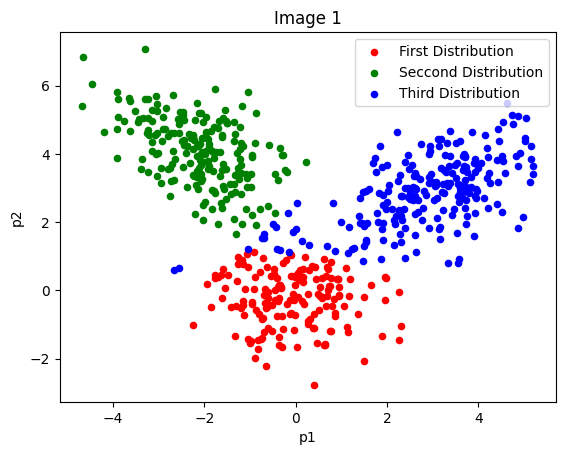

In [24]:
# set the maximum number of steps
max_step = 100
step = 0

# initialize the new means, covariances, and mixture weights with random number
pi = np.zeros([600,3])+[0.2,0.3,0.5]
mu = np.matrix([[2.252,1.215], [1.022,2.123], [1.957,2.526]])
sigma = np.zeros([3,2,2])
sigma[0,:,:] = [[5.978,2.887],[1.124,2.884]]
sigma[1,:,:] = [[5.684,2.477],[1.212,2.369]]
sigma[2,:,:] = [[5.258,2.459],[1.964,2.128]]

# initialize new the means, covariances, and mixture weights with random number
pi_new = np.zeros([600,3])
mu_new = np.zeros([3,2])
sigma_new = np.zeros([3,2,2])

# EM loop
while step<max_step and ((mu_new - mu).all()>1e-4 or (sigma_new - sigma).all()>1e-4):
    if step != 0:
        pi = pi_new
        mu = mu_new
        sigma = sigma_new
    pi_new = E_Step(600,3,df1[df1.columns[1:3]], pi, mu, sigma)
    mu_new, sigma_new = M_Step(600,3,df1[df1.columns[1:3]], pi_new)
    step = step + 1

# assigning each data to a distribution
d1 = pd.DataFrame(columns=['p1','p2'])
d2 = pd.DataFrame(columns=['p1','p2'])
d3 = pd.DataFrame(columns=['p1','p2'])
for i in range(600):
    if pi_new[i,:].max() == pi_new[i,0]:
        d1.loc[len(d1.index)] = df1.iloc[i] 
    elif pi_new[i,:].max() == pi_new[i,1]:
        d2.loc[len(d2.index)] = df1.iloc[i] 
    elif pi_new[i,:].max() == pi_new[i,2]:
        d3.loc[len(d3.index)] = df1.iloc[i] 
        

# plotting image 1
plt.figure
ax = plt.gca()
d1.plot.scatter(x='p1',y='p2', c='r', label='First Distribution', ax=ax)
d2.plot.scatter(x='p1',y='p2', c='g', label='Seccond Distribution', ax=ax)
d3.plot.scatter(x='p1',y='p2', c='b', label='Third Distribution', ax=ax)
plt.title("Image 1")
plt.xlabel("p1")
plt.ylabel("p2")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

## <font color='cyan'>Image 2</font>

e:\Python\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


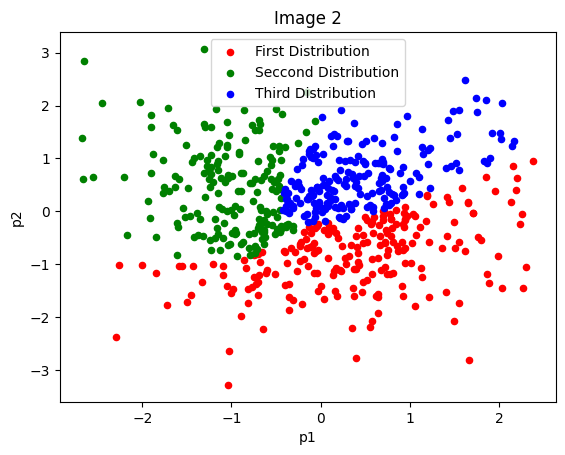

In [25]:
# set the maximum number of steps
max_step = 100
step = 0

# initialize the new means, covariances, and mixture weights with random number
pi = np.zeros([600,3])+[0.2,0.3,0.5]
mu = np.matrix([[2.252,1.215], [1.022,2.123], [1.957,2.526]])
sigma = np.zeros([3,2,2])
sigma[0,:,:] = [[5.978,2.887],[1.124,2.884]]
sigma[1,:,:] = [[5.684,2.477],[1.212,2.369]]
sigma[2,:,:] = [[5.258,2.459],[1.964,2.128]]

# initialize new the means, covariances, and mixture weights with random number
pi_new = np.zeros([600,3])
mu_new = np.zeros([3,2])
sigma_new = np.zeros([3,2,2])

# EM loop
while step<max_step and ((mu_new - mu).all()>1e-4 or (sigma_new - sigma).all()>1e-4):
    if step != 0:
        pi = pi_new
        mu = mu_new
        sigma = sigma_new
    pi_new = E_Step(600,3,df2[df2.columns[1:3]], pi, mu, sigma)
    mu_new, sigma_new = M_Step(600,3,df2[df2.columns[1:3]], pi_new)
    step = step + 1



d1 = pd.DataFrame(columns=['p1','p2'])
d2 = pd.DataFrame(columns=['p1','p2'])
d3 = pd.DataFrame(columns=['p1','p2'])
for i in range(600):
    if pi_new[i,:].max() == pi_new[i,0]:
        d1.loc[len(d1.index)] = df2.iloc[i] 
    elif pi_new[i,:].max() == pi_new[i,1]:
        d2.loc[len(d2.index)] = df2.iloc[i] 
    elif pi_new[i,:].max() == pi_new[i,2]:
        d3.loc[len(d3.index)] = df2.iloc[i] 
        

# plotting image 2
plt.figure
ax = plt.gca()
d1.plot.scatter(x='p1',y='p2', c='r', label='First Distribution', ax=ax)
d2.plot.scatter(x='p1',y='p2', c='g', label='Seccond Distribution', ax=ax)
d3.plot.scatter(x='p1',y='p2', c='b', label='Third Distribution', ax=ax)
plt.title("Image 2")
plt.xlabel("p1")
plt.ylabel("p2")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()